In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [210]:
import tensorflow.keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
file = '../data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
data.describe()

,z,hz,err
count,31.000000,31.000000,31.000000
mean,0.661219,105.922581,21.303226
std,0.520398,38.413424,14.587768
min,0.070000,68.600000,4.000000
25%,0.275000,78.950000,12.000000
50%,0.470000,90.000000,17.000000
75%,0.890000,121.000000,27.900000
max,1.965000,202.000000,62.000000


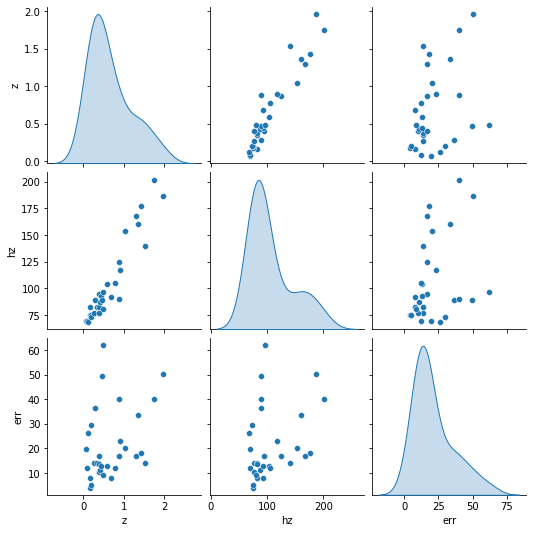

In [212]:
sns.pairplot(data, diag_kind="kde")
# plt.savefig("DistHD.png")

In [213]:
# a = np.array([25,  3,  9,  7, 19,  2, 17, 16,  6, 28, 12, 20, 21, 26, 27, 11,  1,
#        10, 30, 13, 29,  0,  8, 18, 24,  5, 23,  4, 22, 15, 14])
# randomize = np.random.permutation(len(data.values))
shuffle = [x for x in range(len(data.values)) if x%2 ==0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# shuffle

In [214]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)


Read the data for cosmic chronometers

In [215]:

# odds = [x for x in range(len(data)) if x%2 ==0]
# even = [x for x in range(len(data)) if x%2 ==1]
# new_order = np.array(even+odds)
# new_order = np.array([x for x in range(len(data)-1, 0, -1)])
# data = data.values[new_order]
# data = data.values


In [216]:
z = data[:,0]
y = data[:,1:]
# print(randomize)

In [217]:
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
z = scalerz.transform(z.reshape(-1,1))

# scalery = MinMaxScaler(feature_range=(0,1))
# scalery = StandardScaler()
# scalery.fit(y)
# y = scalery.transform(y)

In [218]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)
y_train, y_test = np.split(y, indx)

In [219]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]
#                      tf.keras.callbacks.ReduceLROnPlateau(patience=2)]
# initializer = Constant(value=0.01)
# initializer = RandomNormal()
#     efirst = Dense(150, activation='relu', input_shape=(1,))(input_z)
#     ehidden = Dense(50, activation='relu')(efirst)
# #     ehidden = Dense(150, activation='relu')(efirst)
#     ehidden2 = Dense(150, activation='relu')(ehidden)
#     ehidden2 = Dense(150, activation='relu')(ehidden2)
#     elast = Dense(2, activation='relu')(ehidden2)



In [220]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    ehidden = Dense(200, activation='relu')(efirst)
    ehidden2 = Dense(150, activation='relu')(ehidden)
    elast = Dense(2, activation='linear')(ehidden2)


    return elast


input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_32 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_33 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_34 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [221]:
# batch_size = 4
batch_size = 4
epochs = 100
input_z = Input(shape = (1,))

In [222]:
# autoencoder = Model(input_z, autoencoder(input_z))
# autoencoder.compile(loss='mean_squared_error', optimizer = "adam")
# autoencoder.summary()

In [223]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 5363.8594 - val_loss: 10987.8594
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 5331.4653 - val_loss: 10925.0654
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 5280.4438 - val_loss: 10832.8047
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 5212.5591 - val_loss: 10678.6025
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 5080.1270 - val_loss: 10452.0312
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 4895.4868 - val_loss: 10104.0244
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 4634.3452 - val_loss: 9567.2861
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 4193.7417 - val_loss: 8878.3877
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 3711.2498 - val_loss: 7878.0000
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - 

6/6 [==============================] - 0s 4ms/step - loss: 129.2699 - val_loss: 357.3986
Epoch 82/100
6/6 [==============================] - 0s 4ms/step - loss: 127.6035 - val_loss: 339.6772
Epoch 83/100
6/6 [==============================] - 0s 4ms/step - loss: 129.4801 - val_loss: 334.9929
Epoch 84/100
6/6 [==============================] - 0s 4ms/step - loss: 127.4583 - val_loss: 350.8776
Epoch 85/100
6/6 [==============================] - 0s 4ms/step - loss: 126.5268 - val_loss: 378.7641
Epoch 86/100
6/6 [==============================] - 0s 4ms/step - loss: 127.4256 - val_loss: 354.8548
Epoch 87/100
6/6 [==============================] - 0s 4ms/step - loss: 125.3025 - val_loss: 350.5623
Epoch 88/100
6/6 [==============================] - 0s 4ms/step - loss: 127.2332 - val_loss: 344.0645
Epoch 89/100
6/6 [==============================] - 0s 4ms/step - loss: 124.3339 - val_loss: 355.6891
Epoch 90/100
6/6 [==============================] - 0s 4ms/step - loss: 125.2342 - val_loss: 37

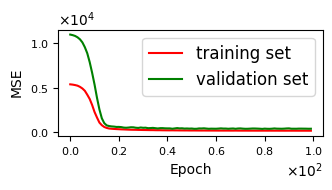

In [236]:
plt.figure(figsize=(3.5, 2), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoch', fontsize=10)
# plt.xlim(0, 100)
# plt.ylim(0, 11500)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.rc('font', size=7)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.tight_layout()

plt.savefig('loss_hz.png')

In [225]:
# neural_model.save('FFNN_Hz.h5')

In [226]:
#uncer net
unet = np.sqrt(np.min(model_train.history['val_loss']))
print(np.min(model_train.history['loss']), np.min(model_train.history['val_loss']))
# print(model_train.history['loss'][-1], model_train.history['val_loss'][-1])
# 119.81427764892578 311.0423889160156 120 epochs
# 120.7300033569336 355.0390930175781
dif_loss = model_train.history['val_loss'][-1] - model_train.history['val_loss'][-2]
val_loss = model_train.history['val_loss'][-1]
dif_loss, val_loss

123.1374740600586 327.3620910644531


(2.951934814453125, 346.142578125)

In [227]:
pred = neural_model.predict(z_test)
pred

array([[ 89.05604 ,  18.272926],
       [100.15146 ,  20.57164 ],
       [111.03903 ,  22.826622],
       [112.56655 ,  23.140837],
       [141.52333 ,  29.09606 ],
       [151.21155 ,  31.087343],
       [175.56302 ,  36.096   ]], dtype=float32)

In [228]:
#zor and yor are the original velues for z and [Hz, err]
zor = scalerz.inverse_transform(z.reshape(-1,1))
# yor = scalery.inverse_transform(y)

In [229]:
# ranz = np.random.uniform(0, 2, size=10000)
ranz = np.linspace(0, 2, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = neural_model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
# predy = scalery.inverse_transform(pred_random)


(0.0, 2.0)

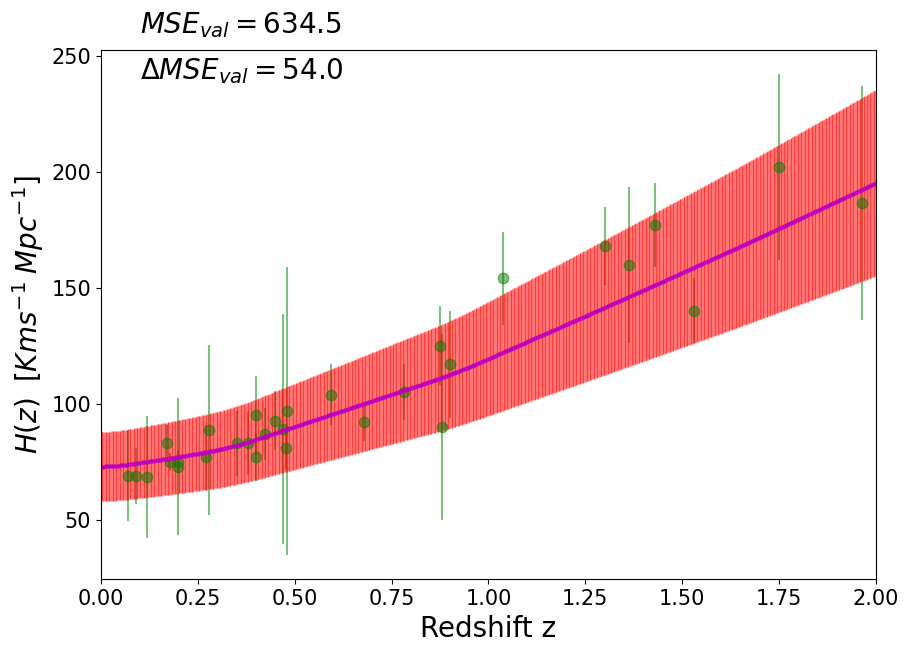

In [230]:
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m')
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.text( 0.1, 260, "$MSE_{val} =  634.5$", fontsize=20 )
plt.text( 0.1, 240, "$\Delta MSE_{val} = 54.0$", fontsize=20 )
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.xlim(0, 2)
# plt.savefig("20_epochs_HD.png")

In [231]:
# Cosmological constants
Om = 0.27
# variance network


In [232]:
def Hlcdm(z, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

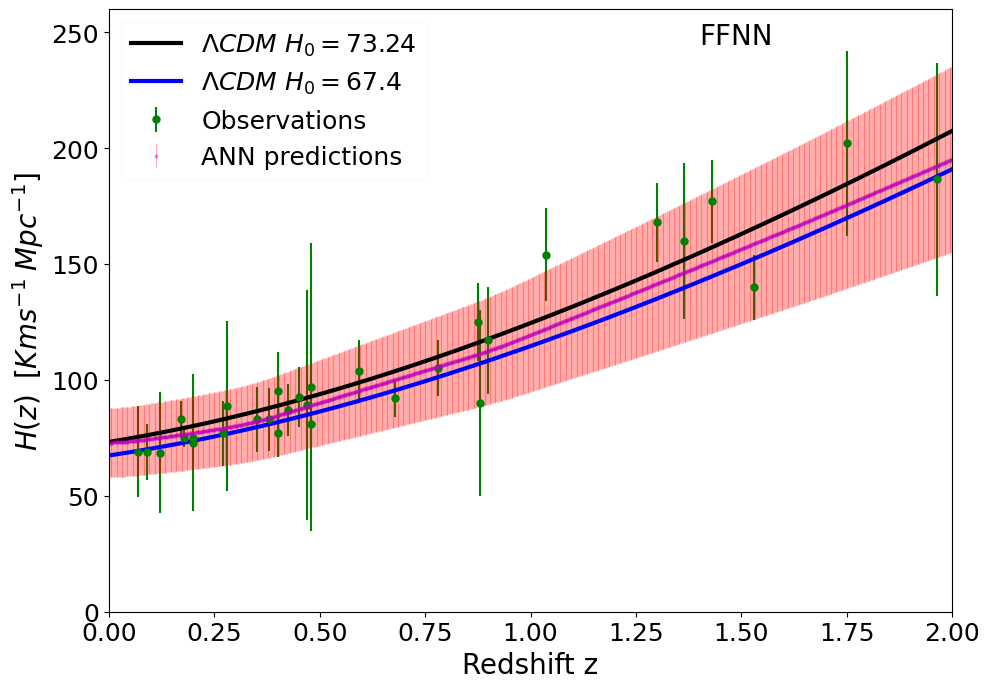

In [251]:
plt.figure(figsize=(10, 7), dpi=100)

zmodel = np.linspace(0, 2, 1000)
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=10, label='Observations')
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')

plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2., fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='ANN predictions')

plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k', linewidth=3)
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b', linewidth=3)
plt.text(1.4, 245, 'FFNN', fontsize=20)

plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.yticks(fontsize=18)
plt.xlim(0, 2)
plt.ylim(0, 260)
plt.tight_layout()
legend = plt.legend(loc='upper left', fontsize=18)
legend.get_frame().set_alpha(0.1)


plt.savefig('recHZ.png')

## $H_0$

In [27]:
h0 = pred_random[0,:]
h0

array([74.2396  , 15.289839], dtype=float32)

In [28]:
pred_random.shape, r.shape

((1000, 2), (1000, 1))

In [29]:
# randomselection = np.random.randint(0,1000,50)
# randomselection = np.random.randint(0,1000,100)

# rr_reduced = rr[randomselection,:]
# predy_reduced = predy[randomselection,:]

# predy_reduced = pred_random[randomselection,:]
rr_reduced = rr
predy_reduced = pred_random

In [30]:
mookHz = np.concatenate((rr_reduced.reshape(-1,1), predy_reduced), axis=1)


# np.savetxt("autoEncoderHz50.dat",mookHz, delimiter=" ")

In [31]:
predy_reduced[:,1]

array([15.289839 , 15.284364 , 15.278892 , 15.273417 , 15.267944 ,
       15.262472 , 15.257    , 15.251525 , 15.246054 , 15.240578 ,
       15.235104 , 15.229633 , 15.224157 , 15.218684 , 15.213214 ,
       15.20777  , 15.2024555, 15.197144 , 15.191828 , 15.186518 ,
       15.181206 , 15.175892 , 15.171957 , 15.168499 , 15.1652565,
       15.162012 , 15.159617 , 15.157823 , 15.156914 , 15.157582 ,
       15.159915 , 15.164705 , 15.172169 , 15.181076 , 15.191042 ,
       15.201008 , 15.210973 , 15.220939 , 15.230901 , 15.240865 ,
       15.2508335, 15.260794 , 15.2707615, 15.2807255, 15.290691 ,
       15.300653 , 15.3106165, 15.320581 , 15.330547 , 15.34051  ,
       15.350475 , 15.360441 , 15.370403 , 15.38037  , 15.390331 ,
       15.400298 , 15.410263 , 15.420227 , 15.430193 , 15.440155 ,
       15.450121 , 15.462055 , 15.474123 , 15.486194 , 15.498263 ,
       15.51033  , 15.522402 , 15.53447  , 15.546539 , 15.558609 ,
       15.570683 , 15.582748 , 15.59482  , 15.606888 , 15.6189

In [32]:
error  = predy_reduced[:,1]**2
error

array([ 233.77917,  233.61177,  233.44453,  233.27728,  233.11012,
        232.94305,  232.77605,  232.60901,  232.44215,  232.2752 ,
        232.10838,  231.94173,  231.77496,  231.60835,  231.44188,
        231.27628,  231.11465,  230.95317,  230.79163,  230.63033,
        230.46901,  230.3077 ,  230.18828,  230.08336,  229.985  ,
        229.88661,  229.814  ,  229.75958,  229.73204,  229.7523 ,
        229.82303,  229.96829,  230.1947 ,  230.46507,  230.76776,
        231.07063,  231.37369,  231.67697,  231.98033,  232.28397,
        232.58792,  232.89183,  233.19615,  233.50056,  233.80524,
        234.11   ,  234.41498,  234.72021,  235.02568,  235.33125,
        235.63708,  235.94316,  236.2493 ,  236.55579,  236.86229,
        237.16919,  237.47621,  237.7834 ,  238.09085,  238.39839,
        238.70624,  239.07515,  239.44849,  239.82219,  240.19617,
        240.57034,  240.94496,  241.31975,  241.69489,  242.07031,
        242.44615,  242.82205,  243.19841,  243.57495,  243.95

In [33]:
diagcov = np.diag(error) #inverso
# np.savetxt("autoEncoderHz_cov50.dat", diagcov, delimiter= " ", header="#50 50")
np.shape(diagcov)

(1000, 1000)

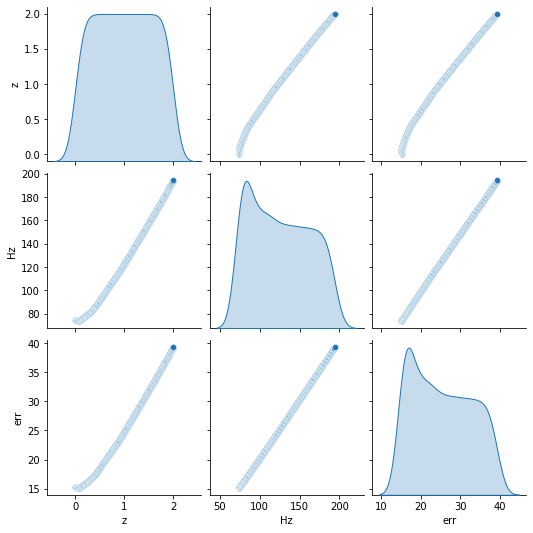

In [34]:
dfMook = pd.DataFrame(mookHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmook.png")

In [35]:
# plt.plot(model_train.history['loss'], color='r')
# plt.plot(model_train.history['val_loss'], color='g')
# plt.xlim(1)
# plt.xscale('log')
# plt.ylabel('MSE')
# # plt.yscale('log')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper right')
# # plt.savefig("loss_hz.png", dpi=200)
# # plt.savefig("epochs_for_Hz.png", dpi=200)

In [36]:
def model2(input_z):
    x = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    elast = Dense(2, activation='linear')(x)


    return elast


input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


#### Now, we not use the statistical error and only use a ANN to given redshift predict $H(z)$. And we estimates its uncertainty with dropout layers.

In [37]:
yy = y[:,0].reshape(-1,1)
zz = z
split = 0.8
ntrain = int(split * len(zz))
indx = [ntrain]
zz_train, zz_test = np.split(zz, indx)
yy_train, yy_test = np.split(yy, indx)
np.shape(zz_train), np.shape(yy_train), np.shape(zz_test), np.shape(yy_test)

((24, 1), (24, 1), (7, 1), (7, 1))

In [38]:
from astroNN.nn.layers import MCDropout

In [39]:
def model_regression_dropout(num_hidden):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    model.add(Dense(units=num_hidden[0], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[1], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[2], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=2, activation="linear"))
    return model

#Define some parameter
batch_size = 4
# optimizer = Adam(lr=.005)
optimizer = Adam(lr=0.0001)


# Compile Keras model
model = model_regression_dropout(num_hidden=[50, 200, 150])
model.compile(loss='mse', optimizer=optimizer) 
# model2_train = model.fit(zz_train, yy_train, 
# #                          validation_split=0.0, 
#                          batch_size=batch_size, epochs=1000, verbose=1,
#                          validation_data=(zz_test, yy_test))    
model2_train = model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=800,verbose=1,
                                    validation_data=(z_test, y_test))

/home/isidro/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/800
6/6 [==============================] - 0s 19ms/step - loss: 5380.5210 - val_loss: 11043.9277
Epoch 2/800
6/6 [==============================] - 0s 4ms/step - loss: 5373.8940 - val_loss: 11012.9238
Epoch 3/800
6/6 [==============================] - 0s 4ms/step - loss: 5372.7104 - val_loss: 11021.4043
Epoch 4/800
6/6 [==============================] - 0s 4ms/step - loss: 5368.4253 - val_loss: 11014.8389
Epoch 5/800
6/6 [==============================] - 0s 4ms/step - loss: 5368.0977 - val_loss: 11012.1592
Epoch 6/800
6/6 [==============================] - 0s 4ms/step - loss: 5365.0649 - val_loss: 11004.0918
Epoch 7/800
6/6 [==============================] - 0s 4ms/step - loss: 5356.8911 - val_loss: 11013.9199
Epoch 8/800
6/6 [==============================] - 0s 4ms/step - loss: 5352.3940 - val_loss: 10995.9844
Epoch 9/800
6/6 [==============================] - 0s 4ms/step - loss: 5357.7466 - val_loss: 11003.6455
Epoch 10/800
6/6 [==============================] - 0s 4ms/step

Epoch 158/800
6/6 [==============================] - 0s 4ms/step - loss: 383.3435 - val_loss: 1119.7566
Epoch 159/800
6/6 [==============================] - 0s 4ms/step - loss: 411.2331 - val_loss: 711.3550
Epoch 160/800
6/6 [==============================] - 0s 4ms/step - loss: 606.2236 - val_loss: 589.2838
Epoch 161/800
6/6 [==============================] - 0s 4ms/step - loss: 408.7515 - val_loss: 747.4776
Epoch 162/800
6/6 [==============================] - 0s 4ms/step - loss: 662.2012 - val_loss: 860.9706
Epoch 163/800
6/6 [==============================] - 0s 4ms/step - loss: 453.2229 - val_loss: 510.0864
Epoch 164/800
6/6 [==============================] - 0s 4ms/step - loss: 554.8770 - val_loss: 775.3818
Epoch 165/800
6/6 [==============================] - 0s 4ms/step - loss: 392.2356 - val_loss: 1001.5921
Epoch 166/800
6/6 [==============================] - 0s 4ms/step - loss: 446.2151 - val_loss: 871.3329
Epoch 167/800
6/6 [==============================] - 0s 4ms/step - loss

6/6 [==============================] - 0s 4ms/step - loss: 309.5123 - val_loss: 703.0096
Epoch 317/800
6/6 [==============================] - 0s 4ms/step - loss: 457.2478 - val_loss: 466.2585
Epoch 318/800
6/6 [==============================] - 0s 4ms/step - loss: 309.9737 - val_loss: 533.2271
Epoch 319/800
6/6 [==============================] - 0s 4ms/step - loss: 272.9705 - val_loss: 686.1688
Epoch 320/800
6/6 [==============================] - 0s 3ms/step - loss: 301.6783 - val_loss: 482.1478
Epoch 321/800
6/6 [==============================] - 0s 4ms/step - loss: 294.4541 - val_loss: 592.5328
Epoch 322/800
6/6 [==============================] - 0s 4ms/step - loss: 356.2923 - val_loss: 540.4467
Epoch 323/800
6/6 [==============================] - 0s 4ms/step - loss: 315.9783 - val_loss: 527.7911
Epoch 324/800
6/6 [==============================] - 0s 4ms/step - loss: 382.9769 - val_loss: 466.5995
Epoch 325/800
6/6 [==============================] - 0s 4ms/step - loss: 341.2280 - val

6/6 [==============================] - 0s 4ms/step - loss: 269.9461 - val_loss: 852.4622
Epoch 475/800
6/6 [==============================] - 0s 4ms/step - loss: 217.1824 - val_loss: 361.5739
Epoch 476/800
6/6 [==============================] - 0s 4ms/step - loss: 302.5676 - val_loss: 349.0858
Epoch 477/800
6/6 [==============================] - 0s 4ms/step - loss: 216.9425 - val_loss: 415.7104
Epoch 478/800
6/6 [==============================] - 0s 4ms/step - loss: 223.0213 - val_loss: 422.1789
Epoch 479/800
6/6 [==============================] - 0s 4ms/step - loss: 278.7740 - val_loss: 363.7907
Epoch 480/800
6/6 [==============================] - 0s 4ms/step - loss: 339.5515 - val_loss: 519.6496
Epoch 481/800
6/6 [==============================] - 0s 4ms/step - loss: 258.7784 - val_loss: 617.4361
Epoch 482/800
6/6 [==============================] - 0s 4ms/step - loss: 261.1908 - val_loss: 727.8968
Epoch 483/800
6/6 [==============================] - 0s 4ms/step - loss: 256.5282 - val

6/6 [==============================] - 0s 4ms/step - loss: 204.4103 - val_loss: 819.7897
Epoch 633/800
6/6 [==============================] - 0s 4ms/step - loss: 320.8397 - val_loss: 738.0654
Epoch 634/800
6/6 [==============================] - 0s 3ms/step - loss: 260.9565 - val_loss: 411.2268
Epoch 635/800
6/6 [==============================] - 0s 3ms/step - loss: 252.6095 - val_loss: 702.0062
Epoch 636/800
6/6 [==============================] - 0s 3ms/step - loss: 194.9713 - val_loss: 929.0400
Epoch 637/800
6/6 [==============================] - 0s 4ms/step - loss: 266.7674 - val_loss: 316.6709
Epoch 638/800
6/6 [==============================] - 0s 4ms/step - loss: 194.1525 - val_loss: 525.8351
Epoch 639/800
6/6 [==============================] - 0s 4ms/step - loss: 200.2547 - val_loss: 386.3828
Epoch 640/800
6/6 [==============================] - 0s 4ms/step - loss: 169.1096 - val_loss: 697.1758
Epoch 641/800
6/6 [==============================] - 0s 4ms/step - loss: 216.5593 - val

6/6 [==============================] - 0s 4ms/step - loss: 365.3333 - val_loss: 293.8105
Epoch 791/800
6/6 [==============================] - 0s 4ms/step - loss: 112.8266 - val_loss: 399.7669
Epoch 792/800
6/6 [==============================] - 0s 4ms/step - loss: 207.5814 - val_loss: 618.8065
Epoch 793/800
6/6 [==============================] - 0s 4ms/step - loss: 240.4959 - val_loss: 764.8199
Epoch 794/800
6/6 [==============================] - 0s 3ms/step - loss: 258.0519 - val_loss: 374.3667
Epoch 795/800
6/6 [==============================] - 0s 4ms/step - loss: 220.4444 - val_loss: 706.5779
Epoch 796/800
6/6 [==============================] - 0s 4ms/step - loss: 208.1481 - val_loss: 533.1451
Epoch 797/800
6/6 [==============================] - 0s 4ms/step - loss: 267.0278 - val_loss: 729.2454
Epoch 798/800
6/6 [==============================] - 0s 4ms/step - loss: 233.6349 - val_loss: 444.7079
Epoch 799/800
6/6 [==============================] - 0s 4ms/step - loss: 214.5984 - val

In [40]:
# Generate test data
test_batch_size = 1000
# x_test = np.random.uniform(0, 2., test_batch_size)
x_test = np.linspace(0, 2., test_batch_size)

mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))
    
# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

In [41]:
np.mean(std_mc_dropout[:,0]), np.mean(std_mc_dropout[:,1])

(15.905154597324671, 5.400869592315023)

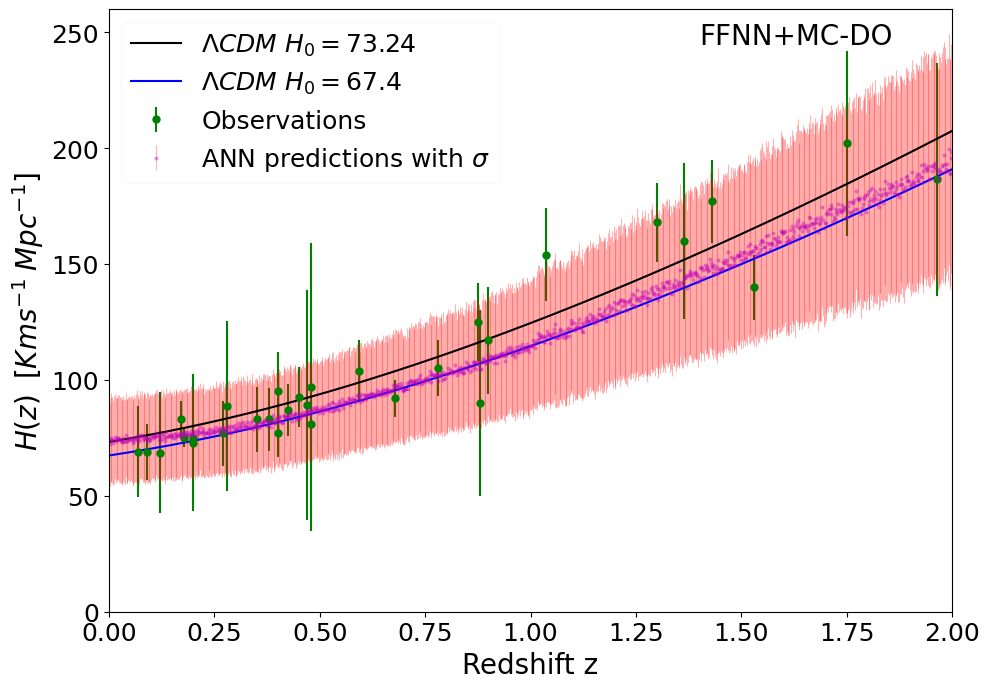

In [243]:
# Plotting
plt.figure(figsize=(10, 7), dpi=100)
# plt.figure(figsize=(5, 4), dpi=100)
sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)


# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')
plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='ANN predictions with $\sigma$')
plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(0,2)
plt.ylim(0, 260)
# plt.xlabel('Redshift')
# plt.ylabel('$H(z)$')
plt.text(1.4, 245, 'FFNN+MC-DO', fontsize=20)
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.legend(loc='best')
legend = plt.legend(loc='upper left', fontsize=18)
legend.get_frame().set_alpha(0.1)
# plt.show()
plt.tight_layout()

plt.savefig('recHZDOl.png')

## $H_0$

In [43]:
 prediction_mc_dropout[0,:]

array([74.14289703, 15.93151077])

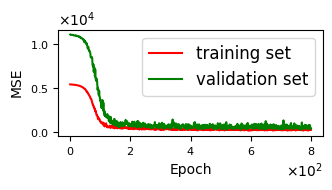

In [235]:
plt.figure(figsize=(3.5, 2), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoch', fontsize=10)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)

# plt.xlim(0, 100)
# plt.ylim(0, 11500)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.tight_layout()
plt.savefig('loss_hz_DO.png')

In [45]:
# model.save('FFNN+MC-DO_Hz.h5')
# tf.keras.models.save_model(neural_model2, '../models/FFNN_MC_DO_Hz.h5' )

In [46]:
mookdpHz = np.concatenate((x_test.reshape(-1,1), prediction_mc_dropout), axis=1)

# np.savetxt("autoEncoderHz50dropout.dat",mookdpHz, delimiter=" ")

In [47]:
diagcov2 = np.diag(sigma**2) #inverso
# np.savetxt("autoEncoderHz_cov50dropout.dat", diagcov2, delimiter= " ", header="#50 50")

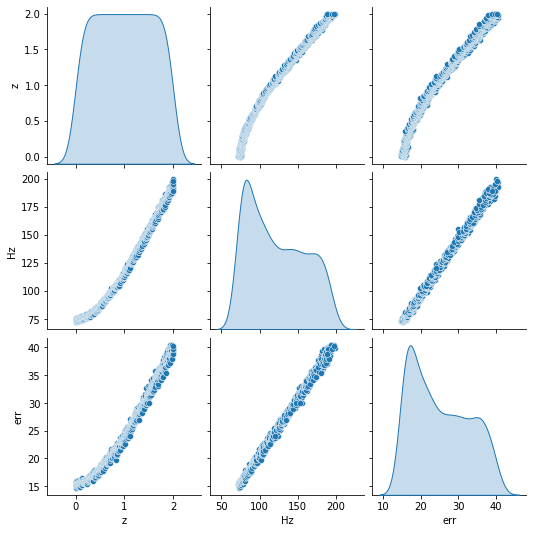

In [48]:
dfMook = pd.DataFrame(mookdpHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmookdropout.png")